# Importing the libraries

In [855]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Reading the data and understanding it

In [856]:
boom = pd.read_csv('day.csv')
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [857]:
boom.shape

(730, 16)

In [858]:
boom.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [859]:
#Summary of numeric columns
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [860]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<font>  1. The date column needs to be converted to correct datatype.
    
<font> 2. season, mnth, weekday, weathersit should be converted to categorical variables.
    
<font> 3. No column has null values.
    </font>

In [861]:
boom['dteday']=pd.to_datetime(boom['dteday'])
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [862]:
boom['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [863]:
def assign_symbol(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [864]:
boom['season']=boom['season'].apply(assign_symbol)

In [865]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [866]:
boom['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [867]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [868]:
boom['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [869]:
def assign_month(x):
    return x.map(
    {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

In [870]:
boom[['mnth']]=boom[['mnth']].apply(assign_month)
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [871]:
boom['mnth'].value_counts()

Jan    62
Dec    62
Oct    62
May    62
Aug    62
Mar    62
Jul    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [872]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [873]:
weekday_labels = {
    0 : 'Sun',
    1 : 'Mon',
    2 : 'Tue',
    3 : 'Wed',
    4 : 'Thu',
    5 : 'Fri',
    6 : 'Sat'
}

weathersit_labels = {
    1 : 'Clear',
    2 : 'Cloudy',
    3 : 'LightSnow',
    4 : 'HeavyRain'
}

In [874]:
boom['weekday'] = boom['weekday'].replace(weekday_labels)
boom['weathersit'] = boom['weathersit'].replace(weathersit_labels)
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [875]:
boom['weathersit'].value_counts()

Clear        463
Cloudy       246
LightSnow     21
Name: weathersit, dtype: int64

In [876]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

# Data Visualization

In [877]:
boom.describe().columns #return only numerical columns hence convert your categorical ones beforehand

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

#### Take all the numerical columns for visualization
   

In [878]:
num_col = boom[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

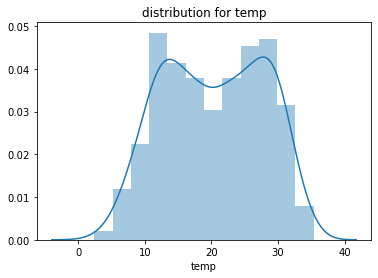

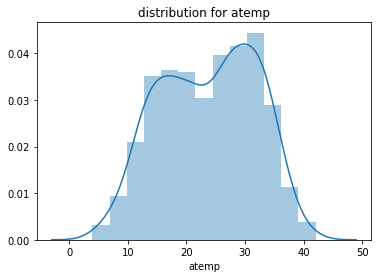

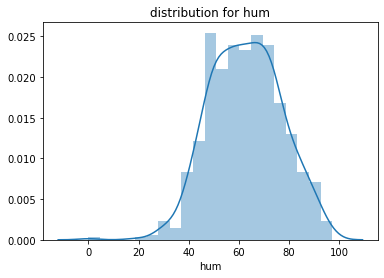

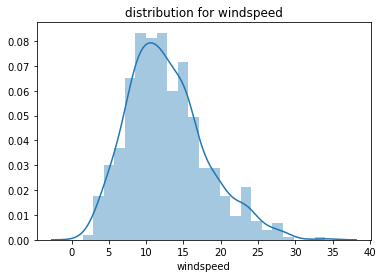

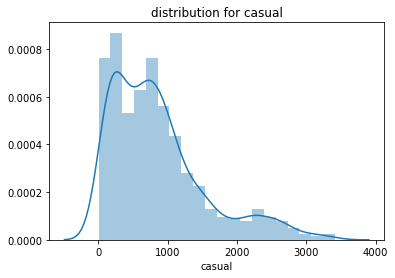

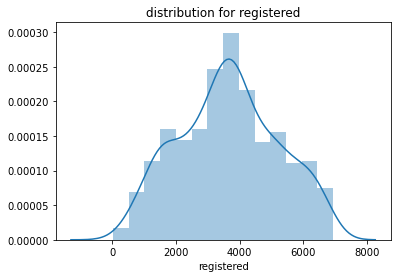

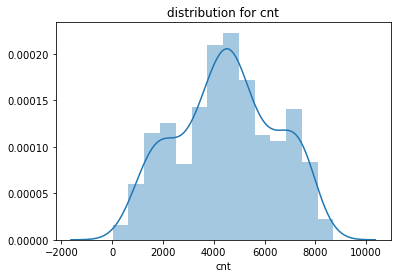

In [879]:
for col in num_col:
    sns.distplot(boom[col])
    plt.title("distribution for "+col)
    plt.show()

temp, atemp and casual variables are not normally distributed. <br>
humidity and windspeed are slightly less normally distributed. <br>


#### Visualize categorical columns

In [880]:
boom.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [881]:
categorical_columns=boom[[ 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [882]:
categorical_columns.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,1,Cloudy
1,spring,0,Jan,0,Tue,1,Cloudy
2,spring,0,Jan,0,Wed,1,Clear
3,spring,0,Jan,0,Thu,1,Clear
4,spring,0,Jan,0,Fri,1,Clear


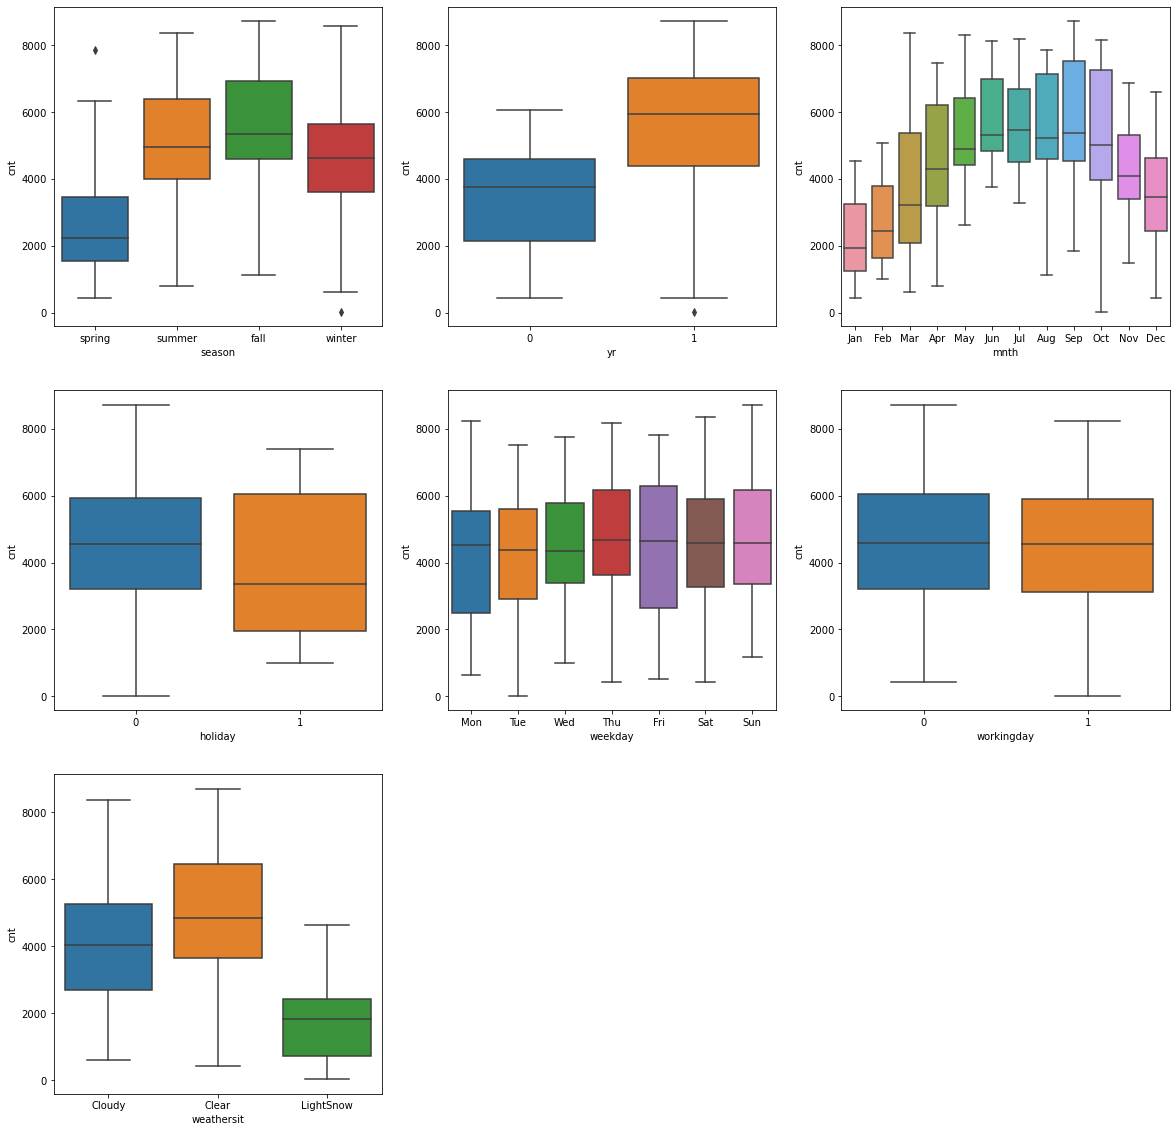

In [883]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=boom)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=boom)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=boom)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=boom)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=boom)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=boom)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=boom)
plt.show()

#### In holistic view, it can be seen that clear weather in fall is favourable for bike rental. In 2019 the demand has increased from last year

In [884]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = boom.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/boom.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/boom.cnt.count()*100
    return round(cat_df,2)

# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    sns.barplot(col,'cnt',data=boom)
    return

In [885]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


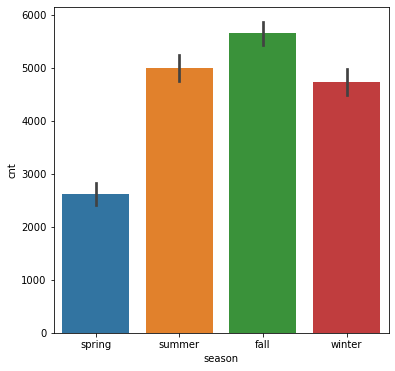

In [886]:
categorical_plot('season',6,6)

#### Almost 32% of the bike booking happen in Fall. It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable.

In [887]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


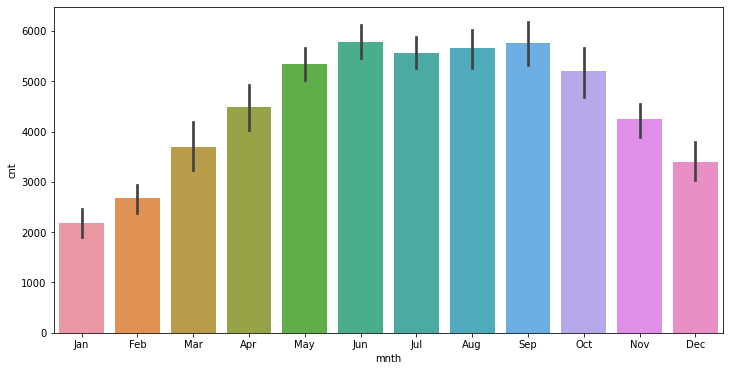

In [888]:
categorical_plot('mnth',12,6)

#### Almost 10% of the bike booking happened in the months' May to Sep. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

In [889]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Cloudy,995024,4044.81,246,30.24,33.70
LightSnow,37869,1803.29,21,1.15,2.88


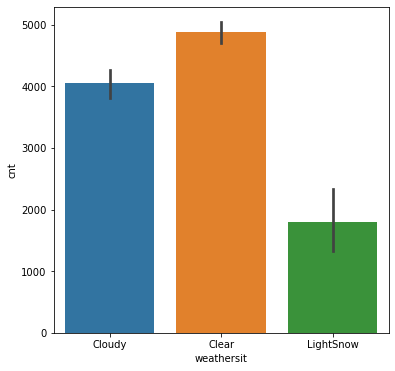

In [890]:
categorical_plot('weathersit',6,6)

#### Almost 69% of the bike booking happened during Clear weather. This was followed by Misty with 30% of the total booking. it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is HeavyRain.

In [891]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


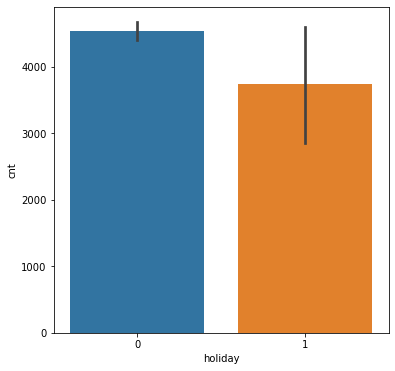

In [892]:
categorical_plot('holiday',6,6)

#### Almost 97% of bike rentals are happening during non-holiday time.

In [893]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


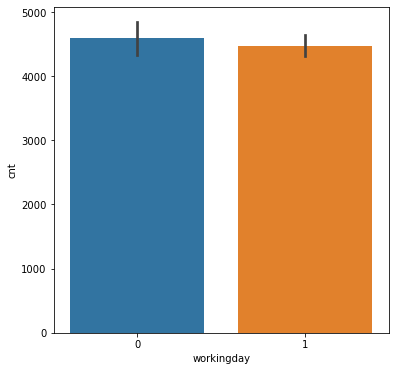

In [894]:
categorical_plot('workingday',6,6)

#### Almost 69% of the bike booking were happening in 'workingday'.

In [895]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


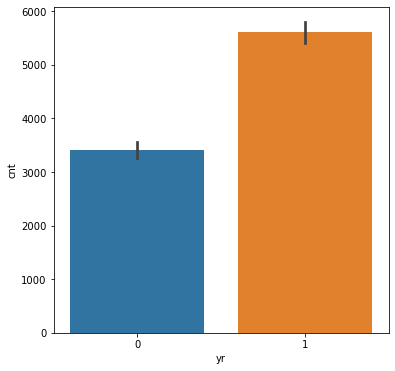

In [896]:

categorical_plot('yr',6,6)
plt.show()

#### Bike rental demand has gone up from 2018 to 2019

### Visualize numeric variables

In [897]:
boom.describe().columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [898]:
x=['temp','atemp','hum','windspeed','casual', 'registered','cnt']
x

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

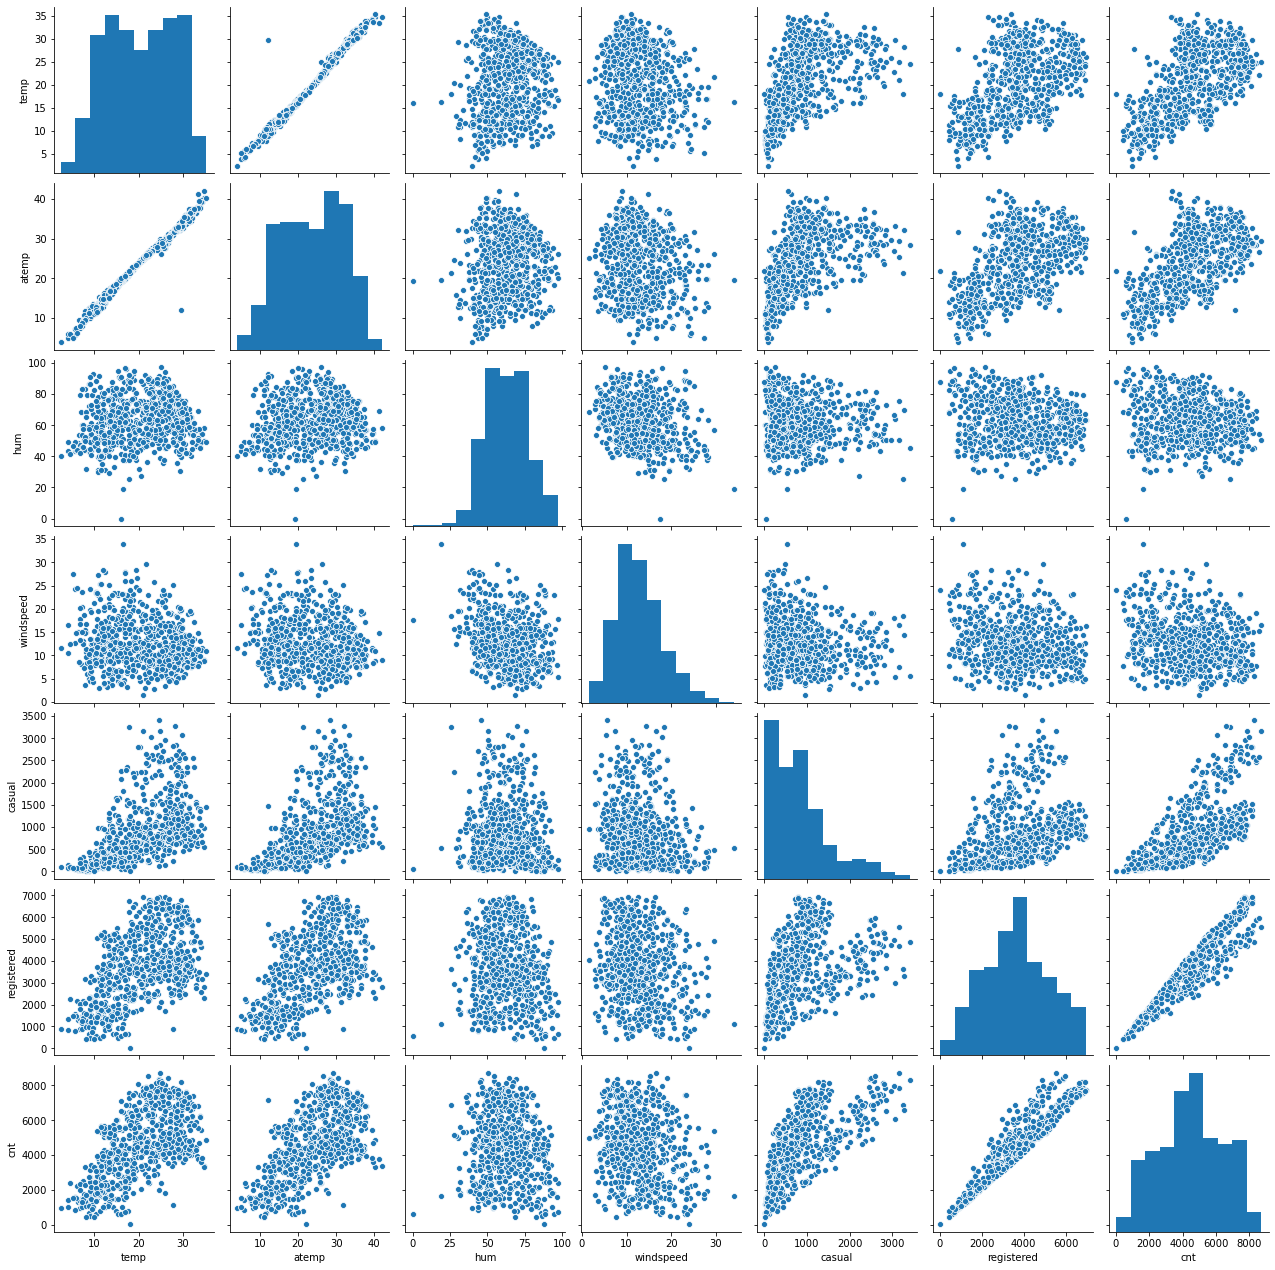

In [899]:
sns.pairplot(boom[x])

#### Analysis 

1. temp vs atemp are very closely co-related. There is highly positive co-relation. Collinearity detected. We can remove one of them. <br>
2. casual vs registered is also having good positive co-relation. <br>
3. registered vs cnt is also higly positively co-related. We can drop one of them. <br>
4. We want those columns which are not highly co-related

In [900]:
boom[x].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Remove the columns where you find high co-relation.

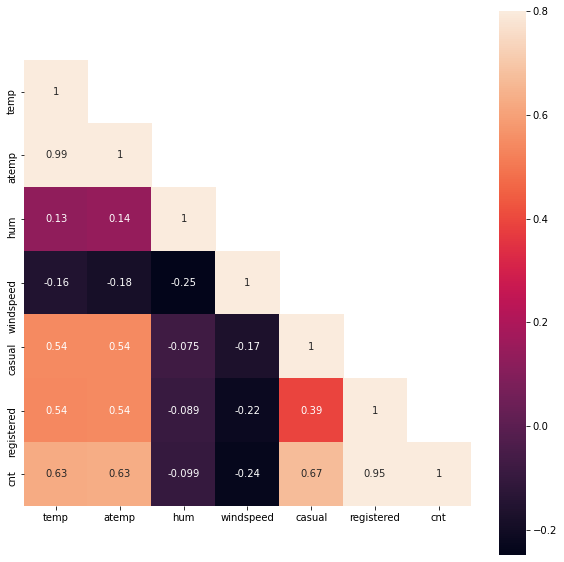

In [901]:
mask = np.array(boom[x].corr())
mask[np.tril_indices_from(mask)] = False
fig , ax =plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(boom[x].corr(),mask=mask,vmax=0.8,square=True,annot=True)
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity issue. Instant is an index column which has no relation to the dependent variable. Casual and registered have high co-relation with cnt variable and we do not have to segregate the count of bike rental based on any customer segment hence dropping those columns as well. 


In [902]:
boom=boom.drop(['casual','registered','atemp','instant'],axis=1)

In [903]:
boom.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Mon,1,Cloudy,14.110847,80.5833,10.749882,985
1,2018-02-01,spring,0,Jan,0,Tue,1,Cloudy,14.902598,69.6087,16.652113,801
2,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [904]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 68.6+ KB


# Creating dummy variables

In [905]:
# creating indicator variable columns
season_indicators = pd.get_dummies(boom['season'],drop_first=True)
mnth_indicators = pd.get_dummies(boom['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(boom['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(boom['weathersit'],drop_first=True)

In [906]:
season_indicators.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [907]:
mnth_indicators.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [908]:
weekday_indicators.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [909]:
weathersit_indicators.head()

,Cloudy,LightSnow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [910]:
boom = pd.concat([boom,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
boom = boom.drop(columns=['season','mnth','weekday','weathersit'])
boom.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnow
0,2018-01-01,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2018-02-01,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,2018-03-01,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2018-04-01,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2018-05-01,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [911]:
pd.set_option('display.max_columns', 500)

In [912]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   yr          730 non-null    int64         
 2   holiday     730 non-null    int64         
 3   workingday  730 non-null    int64         
 4   temp        730 non-null    float64       
 5   hum         730 non-null    float64       
 6   windspeed   730 non-null    float64       
 7   cnt         730 non-null    int64         
 8   spring      730 non-null    uint8         
 9   summer      730 non-null    uint8         
 10  winter      730 non-null    uint8         
 11  Aug         730 non-null    uint8         
 12  Dec         730 non-null    uint8         
 13  Feb         730 non-null    uint8         
 14  Jan         730 non-null    uint8         
 15  Jul         730 non-null    uint8         
 16  Jun         730 non-null  

In [913]:
boom.shape

(730, 30)

# Data Split 

In [914]:
from sklearn.model_selection import train_test_split
dtrain, dtest = train_test_split(boom,train_size=0.7,test_size=0.3,random_state=100)

In [915]:
from sklearn.preprocessing import MinMaxScaler

In [916]:
scaler = MinMaxScaler()

In [917]:
dtrain.shape

(510, 30)

In [918]:
dtest.shape

(219, 30)

# Scaling

In [919]:
num_vars = ['temp', 'hum', 'windspeed']

In [920]:
boom[num_vars].head()

,temp,hum,windspeed
0,14.110847,80.5833,10.749882
1,14.902598,69.6087,16.652113
2,8.050924,43.7273,16.636703
3,8.200000,59.0435,10.739832
4,9.305237,43.6957,12.522300


In [921]:
dtrain[num_vars] = scaler.fit_transform(dtrain[num_vars])
dtrain.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnow
653,2019-10-16,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,2019-07-31,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,2019-03-03,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,2019-12-30,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,2019-04-28,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [922]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [923]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [924]:
X_train.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnow
653,2019-10-16,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,2019-07-31,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,2019-03-03,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,2019-12-30,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,2019-04-28,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [925]:
X_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnow
yr,1.000000,-0.014980,-0.003005,0.107288,-0.084792,-0.001108,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-0.011794,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-0.015469,-6.076399e-02
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.029093,0.017569,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,0.037412,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-0.038279,-2.815377e-02
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.020701,-0.002504,-0.032886,0.030488,0.036097,-0.012875,-0.025020,-3.470925e-03,-0.015711,-0.012361,0.032195,-0.008563,0.021720,0.025939,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,-0.068924,8.289412e-03
temp,0.107288,-0.066282,-0.007643,1.000000,0.155415,-0.187396,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-0.446724,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-0.090161,-3.609266e-02
hum,-0.084792,-0.029093,0.020701,0.155415,1.000000,-0.266895,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-0.071652,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,0.481042,2.450381e-01
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.266895,1.000000,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,0.006793,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,-0.030385,8.689990e-02
spring,-0.036320,0.053339,-0.032886,-0.605988,-0.201134,0.180743,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,0.548861,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,0.013970,-4.455809e-02
summer,0.013856,-0.063232,0.030488,0.125582,-0.013216,0.110089,-0.322955,1.000000,-0.328116,-0.185769,-0.172902,-1.522862e-01,-0.177257,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,0.039442,-4.523062e-02
winter,-0.022638,0.050712,0.036097,-0.233697,0.171579,-0.090649,-0.326377,-0.328116,1.000000,-0.187737,0.314816,-1.538999e-01,-0.179136,-0.165701,-0.163389,-0.189849,-0.174734,0.533619,0.533619,-0.020175,0.016635,-0.019389,-0.032037,-0.054098,0.045054,0.050608,0.023127,1.144484e-01
Aug,0.054774,-0.052728,-0.012875,0.387456,0.053185,-0.111243,-0.184784,-0.185769,-0.187737,1.000000,-0.098929,-8.713318e-02,-0.101421,-0.093814,-0.092506,-0.107486,-0.098929,-0.100180,-0.100180,-0.096395,0.007536,0.032882,0.005308,0.018738,-0.064591,0.007209,0.016625,-5.675323e-02


#### There is multi-colinearity between the variables. We need to consider the factors when developing the model.
#### workingday variable has high negative correlation with Sat & Sun
#### various months and corresponding weather has correlation

# Model Building

In [926]:
# Model Building

from sklearn.linear_model import LinearRegression

Dropping the date variable because it would not fit in the model

In [927]:
X_train=X_train.drop('dteday',axis=1)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [928]:
# Selecting 15 Features using RFE 
from sklearn.feature_selection import RFE
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [929]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Cloudy', True, 1),
 ('LightSnow', True, 1)]

In [930]:
# storing the selected 15 variables in col list
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy', 'LightSnow'],
      dtype='object')

In [931]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [932]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

In [933]:
# Following a stepwise elimination
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [934]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
13,Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


### Model 1

In [935]:
#features_1 = selected_features
X_train_lm1 = sm.add_constant(X_train_rfe)

model1 = sm.OLS(y_train,X_train_lm1).fit()
print(model1.summary())

calculateVIF(X_train_lm1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.34e-189
Time:                        17:04:06   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2805.5562    313.247      8.956      0.0

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,Nov,1.76
10,Jan,1.68
14,Cloudy,1.57
9,Dec,1.49


### Model 2: Dropping Dec due to high p value

In [936]:
del_feature = 'Dec'
X_train_new = X_train_rfe.drop(['Dec'], axis = 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())
calculateVIF(X_train_lm2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.25e-189
Time:                        17:04:06   Log-Likelihood:                -4113.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2656.1102    306.385      8.669      0.0

,Features,VIF
0,const,78.35
6,spring,5.20
3,temp,3.97
8,winter,3.77
7,summer,2.67
4,hum,1.91
9,Jan,1.57
13,Cloudy,1.56
10,Jul,1.49
11,Nov,1.48


### Model 3: Dropping Nov due to high p value

In [937]:

X_train_new3 = X_train_new.drop(['Nov'], axis = 1)
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())
calculateVIF(X_train_lm3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.45e-190
Time:                        17:04:06   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2592.3946    303.623      8.538      0.0

,Features,VIF
0,const,76.77
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.91
9,Jan,1.57
12,Cloudy,1.56
10,Jul,1.49
11,Sep,1.30


### Model 4: Dropping Jan due to high p value

In [938]:

X_train_new4 = X_train_new3.drop(['Jan'], axis = 1)
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())
calculateVIF(X_train_lm4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.69e-190
Time:                        17:04:06   Log-Likelihood:                -4116.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2491.6822    299.629      8.316      0.0

,Features,VIF
0,const,74.38
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,hum,1.90
11,Cloudy,1.56
9,Jul,1.48
10,Sep,1.30
12,LightSnow,1.24


### Model 5: Dropping spring because of high VIF

In [939]:
X_train_new5 = X_train_new4.drop(['spring'], axis = 1)
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())
calculateVIF(X_train_lm5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.89e-190
Time:                        17:04:06   Log-Likelihood:                -4120.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     498   BIC:                             8315.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1984.0721    234.480      8.462      0.0

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
10,Cloudy,1.55
8,Jul,1.43
6,summer,1.33
7,winter,1.29
11,LightSnow,1.24
9,Sep,1.19
5,windspeed,1.18


### Model 6: Dropping Jul because I need to find top 10 features for the model

In [940]:
X_train_new6 = X_train_new5.drop(['Jul'], axis = 1)
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())
calculateVIF(X_train_lm6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          7.80e-190
Time:                        17:04:06   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     499   BIC:                             8316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1983.3145    235.900      8.407      0.0

,Features,VIF
0,const,44.99
4,hum,1.86
9,Cloudy,1.55
3,temp,1.27
7,winter,1.25
10,LightSnow,1.23
6,summer,1.19
5,windspeed,1.18
8,Sep,1.11
1,yr,1.03


In [941]:
lr6.params

const        1983.314522
yr           1989.724157
holiday      -851.501382
temp         4959.708557
hum         -1512.175077
windspeed   -1622.847494
summer        778.154945
winter       1218.617686
Sep           927.708673
Cloudy       -450.518465
LightSnow   -2057.180862
dtype: float64

### Final model developed. This has low p-values and all the VIF values under 5.
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. The coefficients are all not null hence we REJCT the NULL HYPOTHESIS. For now, we will consider this as our final model.

# Residual Analysis

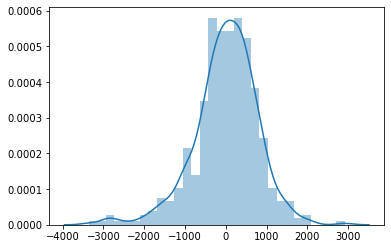

In [942]:
# Residual Analysis of Trained Data
y_train_pred = lr6.predict(X_train_lm6)
sns.distplot(y_train-y_train_pred, bins=30)

In [943]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-8.75611565824525e-13

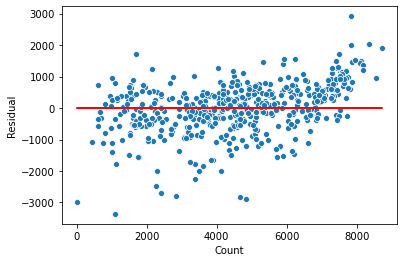

In [944]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no visible pattern in residual values, thus homoscedacity is well preserved

In [945]:
calculateVIF(X_train_lm6)

,Features,VIF
0,const,44.99
4,hum,1.86
9,Cloudy,1.55
3,temp,1.27
7,winter,1.25
10,LightSnow,1.23
6,summer,1.19
5,windspeed,1.18
8,Sep,1.11
1,yr,1.03


All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

## Making predictions

### Preparing the test data as the train was prepared

In [946]:
num_vars = ['temp', 'hum', 'windspeed']
dtest[num_vars] = scaler.transform(dtest[num_vars])
dtest.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnow
184,2018-04-07,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,2019-06-20,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,2018-10-27,0,0,0,0.511964,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,2018-10-08,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,2018-02-06,0,0,0,0.817246,0.314298,0.537414,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [947]:
y_test = dtest.pop('cnt')
X_test = dtest.drop('dteday',axis=1)

In [948]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [949]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightSnow
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [950]:
#Selecting the variables that were part of final model.
col1=X_train_lm6.columns
col1=col1[1:]
col1


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Sep',
       'Cloudy', 'LightSnow'],
      dtype='object')

In [951]:
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   temp       219 non-null    float64
 4   hum        219 non-null    float64
 5   windspeed  219 non-null    float64
 6   summer     219 non-null    uint8  
 7   winter     219 non-null    uint8  
 8   Sep        219 non-null    uint8  
 9   Cloudy     219 non-null    uint8  
 10  LightSnow  219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(5)
memory usage: 13.0 KB


In [952]:
# Making predictions using the final model (lr6)
y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

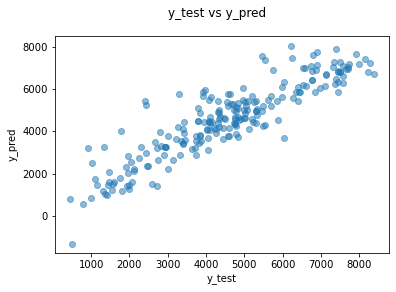

In [953]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

# R2 value

In [954]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8046

# Adjusted R2

In [955]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7952

# Mean Squared Error

In [956]:
from math import sqrt
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

837.2671

# Mean Absolute Error

In [957]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

626.8715

# Co-efficients

In [958]:
lr6.params

const        1983.314522
yr           1989.724157
holiday      -851.501382
temp         4959.708557
hum         -1512.175077
windspeed   -1622.847494
summer        778.154945
winter       1218.617686
Sep           927.708673
Cloudy       -450.518465
LightSnow   -2057.180862
dtype: float64

# Conclusion
Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 
The 10 most significant features to understand demand have been reported. 

The data set is randomly divided into training and test data. 
`Final Model` built on training data set explains 83% of the variability  and  achieves 79% on test data.  
The final relationship between demand and predictors is as follows.    
* ```cnt``` = 1983.3145 + 1989.7241 * ```yr``` - 851.5013 * ```holiday``` + 4959.7085 * ```temp``` - 1512.1750 * ```hum``` -1622.8474 * ```windspeed``` + 778.1549 *  ```summer``` + 1218.6176 * ```winter``` + 927.7086 * ```Sep``` - 450.5184 * ```Cloudy``` - 2057.1808 * ```LightSnow```   
  
where ```temp``` , ```windspeed``` and ```hum``` are normalized. 

Note :    
</span>
<div >
    <span >
        <p><b>As per the final model, the top 5 variables that influences bike booking are: </b></p><hr>
            <li><b>Windspeed</b><br> Coefficient of '-1622.8474' means with increase in wind people do not tend to rent out bikes.</li>
            <li><b>Cloudy (weathersit=2)</b><br> A coefficient value of ‘- 450.5184’ indicates that cloudy weather has negative impact on bike rentals. </li>
            <li><b>Temperature (Temp)</b><br> A coefficient value of ‘4959.7085’ indicated that a temperature has significant impact on bike rentals. </li>
            <li><b>Light Rain & Snow (weathersit =3)</b><br>A coefficient value of ‘- 2057.1808’ indicated that the light snow and rain deters people from renting out bikes</li>
            <li><b> Year (yr) </b><br>A coefficient value of ‘1989.7241’ indicates that a year wise the rental numbers are increasing</li>
        </ol>
    As high temperature and good weather like cloudy positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals. 
        </p>
     </span> 
</div>   